**HJM Model using python**

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import splrep,splev

In [20]:
start=date(2014,1,2)
series_code = ['THREEFF1', 'THREEFF2','THREEFF3','THREEFF4','THREEFF5','THREEFF6', 'THREEFF7', 'THREEFF8', 'THREEFF9', 'THREEFF10']
forward_rates=DataReader(series_code,"fred",start)

Text(0, 0.5, 'Rates')

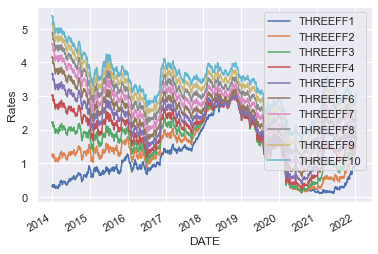

In [18]:
forward_rates.head()
forward_rates.dropna(axis=0,inplace=True)
%matplotlib inline
sns.set()
forward_rates.plot()
plt.ylabel("Rates")

Text(0, 0.5, 'Rates Diff')

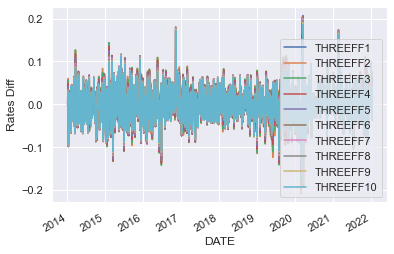

In [25]:
fwdrates=forward_rates.diff()
fwdrates.head()
fwdrates.dropna(axis=0,inplace=True)
%matplotlib inline
sns.set()
fwdrates.plot()
plt.ylabel("Rates Diff")

In [26]:
fwdrates.columns=["One Year","Two","Three","Four","Five","Six","Seven","Eight","Nine","Ten"]

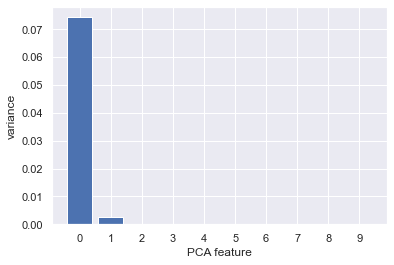

In [49]:
scaled_fwdrates=fwdrates*250/100
from sklearn.decomposition import PCA
model=PCA()
pca_features=model.fit(scaled_fwdrates)
features = range(pca_features.n_components_)
plt.bar(features, pca_features.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [60]:
cov = np.cov(scaled_fwdrates.T)

The largest explained variance is 96.60364792012271%
The second largest is 3.303872474951907%
The third largest is 0.09238241904566863%
Principal eigenvalues 
 [[-0.22019399 -0.59327139  0.74007135 -0.0447717  -0.10567984 -0.03788041
   0.1144971  -0.07143142 -0.13528761 -0.02675138]
 [-0.30694544 -0.50315131 -0.27054823  0.15789045  0.26713601  0.14549828
  -0.38967433  0.41969505  0.35708603  0.08040935]
 [-0.3371495  -0.28239033 -0.40994118 -0.07921629  0.04144193 -0.26375459
   0.21809023 -0.68352138  0.18075023 -0.11635951]] 
 Eigen values
 [7.43241875e-02 2.54190854e-03 7.10764902e-05]


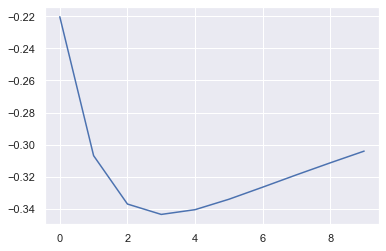

In [111]:
eigval, eigvec = np.linalg.eig(cov)
eigval1, eigval2, eigval3 = eigval[0:3]
PC1= eigvec[:, 0]
plt.plot(PC1)
print('The largest explained variance is {}%'.format(eigval1*100/sum(eigval)))
print('The second largest is {}%'.format(eigval2*100/sum(eigval)))
print('The third largest is {}%'.format(eigval3*100/sum(eigval)))
largest_vectors=eigvec[0:3,:]
print("Principal eigenvalues \n",eigvec[0:3,:],"\n Eigen values\n",eigval[0:3])

[-0.0600303  -0.16174039  0.20176168 -0.01220587 -0.02881093 -0.01032713
  0.03121473 -0.01947397 -0.03688273 -0.00729308]


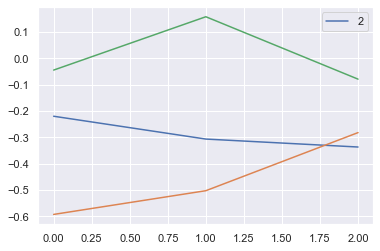

In [114]:
plt.plot(largest_vectors[:,0])
plt.legend("1")
plt.plot(largest_vectors[:,1])
plt.legend("2")
plt.plot(largest_vectors[:,3])
plt.legend("2")

vol1 = np.sqrt(eigval1) * largest_vectors[0]
vol2 = np.sqrt(eigval2) * largest_vectors[1]
vol3 = np.sqrt(eigval3) * largest_vectors[2]
print(vol1)

In [115]:
x = np.linspace(0, 10, 10)
spl = splrep(x, vol1)
spl2 = splrep(x, vol2)
x2 = np.linspace(0, 10, 200)
y = splev(x2, spl)
y2 = splev(x2, spl2)

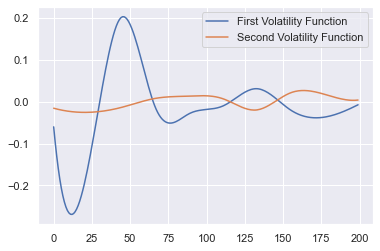

In [116]:
plt.plot(y, label="First Volatility Function")
plt.plot(y2, label="Second Volatility Function")
plt.legend()
plt.show()